In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset.csv').values
data

array([[10.  ,  1.  ,  1.  ],
       [ 5.  ,  2.  ,  1.  ],
       [ 6.  ,  1.8 ,  1.  ],
       [ 7.  ,  1.  ,  1.  ],
       [ 8.  ,  2.  ,  1.  ],
       [ 9.  ,  0.5 ,  1.  ],
       [ 4.  ,  3.  ,  1.  ],
       [ 5.  ,  2.5 ,  1.  ],
       [ 8.  ,  1.  ,  1.  ],
       [ 4.  ,  2.5 ,  1.  ],
       [ 8.  ,  0.1 ,  0.  ],
       [ 7.  ,  0.15,  0.  ],
       [ 4.  ,  1.  ,  0.  ],
       [ 5.  ,  0.8 ,  0.  ],
       [ 7.  ,  0.3 ,  0.  ],
       [ 4.  ,  1.  ,  0.  ],
       [ 5.  ,  0.5 ,  0.  ],
       [ 6.  ,  0.3 ,  0.  ],
       [ 7.  ,  0.2 ,  0.  ],
       [ 8.  ,  0.15,  0.  ]])

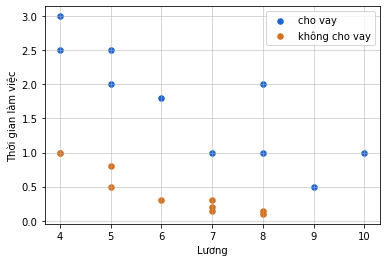

In [8]:
r, c = data.shape
x = data[:, 0: c-1].reshape(-1, c-1)
y = data[:, 2].reshape(-1, 1)

#Vẽ đồ thị scatter 
def draw_scatter(x):
    plt.scatter(x[:10, 0], x[:10, 1], c='#1963DC', s=30, label='cho vay')
    plt.scatter(x[10:, 0], x[10:, 1], c='#DC6F19', s=30, label='không cho vay')
    plt.legend(loc=1)
    plt.grid(axis = "both", lw = 0.5)
    plt.xlabel('Lương')
    plt.ylabel('Thời gian làm việc')
draw_scatter(x)

**2. Dùng thuật toán gradient descent, implement thuật toán logistic regeression**

**3. Chạy toán toán logistic regression implement ở ý 2 cho dataset,  https://github.com/nttuan8/DL_Tutorial/blob/master/L2/dataset.csv.**

**4. Vẽ đường boundary cho 2 class**

Gradient descent:
 [[-7.26111475]
 [ 0.63022655]
 [ 3.64508734]]


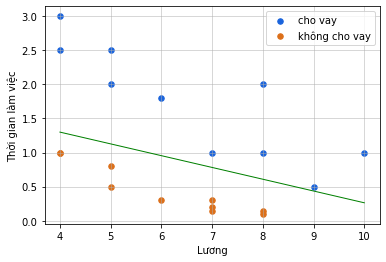

In [9]:
#Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Vẽ biểu đồ scatter
draw_scatter(x)

# Thêm cột 1 vào dữ liệu x
x = np.hstack((np.ones((r, 1)), x))
w = np.array([0.,0.1,0.1]).reshape(-1,1)

# Số lần lặp lại bước 2
learning_rate = 0.01
num_interations = 1000
cost = np.zeros((num_interations, 1))

#2. Dùng thuật toán gradient descent, implement thuật toán logistic regeression
#3. Chạy toán toán logistic regression implement ở ý 2 cho dataset 

def predict(x, w): 
    y_predict = sigmoid(np.dot(x, w))
    return y_predict

def compute_cost(y):
    cost = - np.sum(y * np.log(y_predict) + (1 - y) * np.log(1-y_predict))
    return cost

def gradient_descent(x, w):
    return w - learning_rate * np.dot(x.T, y_predict-y)

for i in range(1, num_interations): 
    y_predict = predict(x, w)
    cost[i] = compute_cost(y)
    w = gradient_descent(x, w)

print(f"Gradient descent:\n {gradient_descent(x, w)}")

#4. Vẽ đường boundary cho 2 class.
t = 0.5
plt.plot((4, 10),(-(w[0] + 4*w[1] + np.log(1/t-1)) / w[2], -(w[0] + 10*w[1] + np.log(1/t-1)) / w[2]), 'g', linewidth = 1)
plt.show()